In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Dropout, BatchNormalization
import pandas as pd
import numpy as np


In [0]:
from keras.datasets import fashion_mnist
import keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:

X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Vanilla Model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras import regularizers
def make_model():
    model = Sequential([
        Dense(64,activation='relu',input_shape=(28,28)),
        Flatten(),
        Dense(10,activation='softmax'),
    ])
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
    return model

In [53]:
clf = KerasClassifier(make_model)
res=clf.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,validation_split=(10000/60000))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 40us/step - loss: 8.7438 - accuracy: 0.7602 - val_loss: 3.8725 - val_accuracy: 0.8140
Epoch 2/100
50000/50000 [==============================] - 2s 39us/step - loss: 3.1367 - accuracy: 0.8209 - val_loss: 3.2434 - val_accuracy: 0.7898
Epoch 3/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.8709 - accuracy: 0.8383 - val_loss: 1.9493 - val_accuracy: 0.8219
Epoch 4/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.2625 - accuracy: 0.8457 - val_loss: 1.4746 - val_accuracy: 0.8207
Epoch 5/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.8916 - accuracy: 0.8489 - val_loss: 1.1522 - val_accuracy: 0.8216
Epoch 6/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.6832 - accuracy: 0.8543 - val_loss: 1.0219 - val_accuracy: 0.8245
Epoch 7/100
50000/50000 [==============================] - 2s 

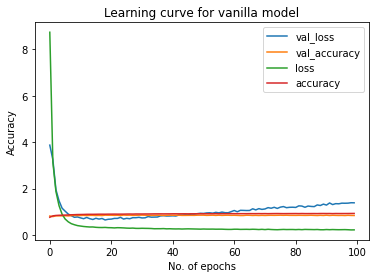

In [56]:
import matplotlib.pyplot as plt
pd.DataFrame(res.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for vanilla model");

The accuracy increases and the loss decreases with the epochs


In [57]:
score = clf.score(X_test, y_test, verbose=0)
print("Test Accuracy: ",score)

Test Accuracy:  0.8345999717712402


model using drop-out

In [69]:
def make_model_drop():
          model = Sequential()
          model.add(Dense(64, input_shape=input_shape, activation='relu'))
          model.add(Dropout(0.5))
          model.add(Flatten())
          model.add(Dense(64, input_shape=input_shape, activation='relu'))
          model.add(Dropout(0.5))
          model.add(Dense(10, activation='softmax'))
          model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          return model
clf1 = KerasClassifier(make_model_drop)
res1=clf1.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,validation_split=(10000/60000))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 86us/step - loss: 6.0650 - accuracy: 0.1553 - val_loss: 1.9204 - val_accuracy: 0.2595
Epoch 2/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.9553 - accuracy: 0.2528 - val_loss: 1.4993 - val_accuracy: 0.4185
Epoch 3/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.7033 - accuracy: 0.3397 - val_loss: 1.3749 - val_accuracy: 0.4658
Epoch 4/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.5539 - accuracy: 0.3940 - val_loss: 1.1794 - val_accuracy: 0.5420
Epoch 5/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.4225 - accuracy: 0.4450 - val_loss: 1.0386 - val_accuracy: 0.5972
Epoch 6/100
50000/50000 [==============================] - 4s 82us/step - loss: 1.3097 - accuracy: 0.4849 - val_loss: 0.9518 - val_accuracy: 0.6331
Epoch 7/100
50000/50000 [==============================] - 4s 

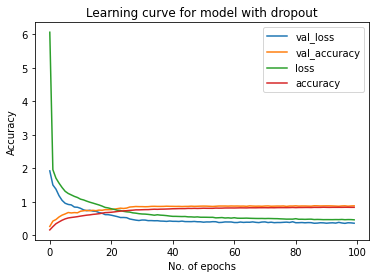

In [70]:
pd.DataFrame(res1.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model with dropout");

In [71]:
score = clf1.score(X_test, y_test, verbose=0)
print("Test Accuracy: ",score)

Test Accuracy:  0.8707000017166138


Performance of model with drop out is better than vanilla model. We were also able to learn a bigger network.

MODEL 3 a model using batch normalization

In [72]:
def make_model_batch():
          model = Sequential()
          model.add(Dense(64, input_shape=input_shape, activation='relu'))
          model.add(BatchNormalization())
          model.add(Flatten())
          model.add(Dense(64, input_shape=input_shape, activation='relu'))
          model.add(BatchNormalization())
          model.add(Dense(10, activation='softmax'))
          model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          return model
clf2 = KerasClassifier(make_model_batch)
res2=clf2.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1,validation_split=(10000/60000))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 101us/step - loss: 0.4464 - accuracy: 0.8439 - val_loss: 0.3489 - val_accuracy: 0.8724
Epoch 2/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.3054 - accuracy: 0.8885 - val_loss: 0.3211 - val_accuracy: 0.8824
Epoch 3/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.2599 - accuracy: 0.9050 - val_loss: 0.3198 - val_accuracy: 0.8850
Epoch 4/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.2280 - accuracy: 0.9165 - val_loss: 0.3201 - val_accuracy: 0.8872
Epoch 5/100
50000/50000 [==============================] - 5s 94us/step - loss: 0.2015 - accuracy: 0.9262 - val_loss: 0.3090 - val_accuracy: 0.8914
Epoch 6/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.1808 - accuracy: 0.9345 - val_loss: 0.3218 - val_accuracy: 0.8902
Epoch 7/100
50000/50000 [==============================] - 5s

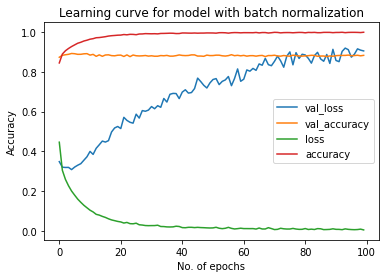

In [73]:
pd.DataFrame(res2.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model with batch normalization");

In [74]:
score = clf2.score(X_test, y_test, verbose=0)
print("Test Accuracy: ",score)

Test Accuracy:  0.8831999897956848



The performance of the model with batch normalization is better than both vanilla model and model with drop out.